### Importing the libraries

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

In [4]:
pd.set_option('display.max_columns', None)
df_deliveries = pd.read_csv("deliveries.csv", low_memory=False)
df_matches = pd.read_csv("matches.csv", low_memory=False)

### Checking the data

In [8]:
df_deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
df_deliveries.shape

(179078, 21)

In [6]:
df_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
df_matches.shape

(756, 18)

### Checking if the column has Null values to decide what to do

In [14]:
# % of columns without values
print("Percentage of Null values per column - Deliveries")
df_deliveries.isna().sum() / len(df_deliveries) * 100

Percentage of Null values per column - Deliveries


match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

- In the Deliveries dataset only the columns player_dismissed, dismissal_kind and fielder have null values

In [15]:
# % of columns without values
print("Percentage of Null values per column - Matches")
df_matches.isna().sum() / len(df_matches) * 100

Percentage of Null values per column - Matches


id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

- In the Matches dataset the column umpire3 has almost 85% of null values

In [21]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [22]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [140]:
df_matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


### Let´s check how many teams we have

In [119]:
list_teams = df_matches['team1'].unique()
print(f"It has {len(list_teams)} teams.\n{list_teams}")

It has 15 teams.
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


### Let´s check how many matches each team won

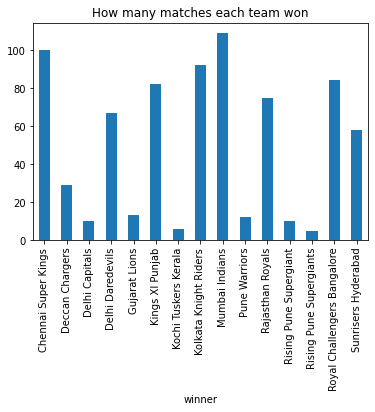

In [141]:
df_matches.groupby('winner')['id'].count().plot.bar()
plt.title('How many matches each team won')
plt.show()

- The team **Mumbai Indians** was the team that had more victories

### Let´s check how many victories by toss

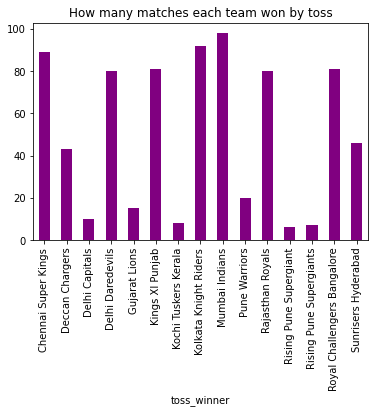

In [145]:
df_matches.groupby('toss_winner')['id'].count().plot.bar(color='purple')
plt.title('How many matches each team won by toss')
plt.show()

- The team **Mumbai Indians** was the team that had more victories by toss

### Now let´s check how many points by runs or wicktes

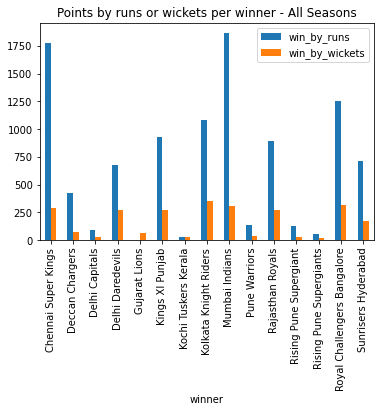

In [159]:
df_matches.groupby('winner')[['win_by_runs','win_by_wickets']].sum().plot.bar()
plt.title(f'Points by runs or wickets per winner - All Seasons')
plt.show()

- The team **Mumbai Indians** had more points **by runs**
- The team **Kolkata Knight Riders** had more points **by wickets**

### Let´s check the Player of Match in all Season

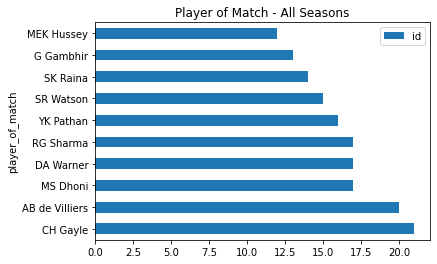

In [194]:
df_player = df_matches.groupby(['player_of_match'])['id'].count().reset_index()
df_player.sort_values(by='id',ascending=False, inplace=True)
df_player.set_index('player_of_match',inplace=True)
df_player.head(10).plot.barh()
plt.title(f'Player of Match - All Seasons')
plt.show()

- The player of Match of all seasons was **CH Gayle**. In 756 matches he was highlight in 21.

### Let´s check which teams **CH Gayle** was playing when he was the player of match

In [201]:
df_matches[df_matches['player_of_match'] == 'CH Gayle'].sort_values(by='season')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
122,123,2009,Durban,21/04/2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN
257,258,2011,Kolkata,22/04/2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN
279,280,2011,Bangalore,06/05/2011,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,85,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,RB Tiffin,NaN
282,283,2011,Bangalore,08/05/2011,Kochi Tuskers Kerala,Royal Challengers Bangalore,Kochi Tuskers Kerala,bat,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,SS Hazare,NaN
290,291,2011,Bangalore,14/05/2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN
301,302,2011,Bangalore,22/05/2011,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,CH Gayle,M Chinnaswamy Stadium,K Hariharan,RE Koertzen,NaN
305,306,2011,Chennai,27/05/2011,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,43,0,CH Gayle,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
359,360,2012,Mumbai,09/05/2012,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Wankhede Stadium,BF Bowden,VA Kulkarni,NaN
371,372,2012,Delhi,17/05/2012,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Feroz Shah Kotla,HDPK Dharmasena,C Shamshuddin,NaN
361,362,2012,Pune,11/05/2012,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,35,0,CH Gayle,Subrata Roy Sahara Stadium,BF Bowden,SK Tarapore,NaN


#### Teams that CH Gayle played and was the Highlight in each Season
- Kolkata Knight Riders - 2009(1)
- Royal Challengers Bangalore - 2011(6), 2012(5), 2013(3), 2015(2), 2017(1)
- Kings XI Punjab - 2018(2), 2019(1)
